# Your first CNN using Tensorflow on CIFAR-10

In this task you will: 
* define your first CNN architecture for CIFAR-10 dataset using Tensorflow
* train it from scratch
* report results

CIFAR-10 dataset contains 32x32 color images from 10 classes: __airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck__:
<img src="images/cifar10.jpg" style="width:80%">

# Import Libraries

In [3]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model, models
from tensorflow.keras.optimizers import Adam

# Load dataset

You would use Keras datasets to load cifar 10 dataset and save it as train (x_train) and test data (x_test) with their labels, y_train and y_test, respectively

In [5]:
 ### YOUR CODE HERE
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.cifar10.load_data()


170500096/170498071 [==============================] - 7s 0us/step


In [6]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


**Expected Output**:

<table>
    <tr>
        <td>
            Train samples:
        </td>
        <td>
           (50000, 32, 32, 3) (50000, 1)
        </td>
    </tr>
        <tr>
        <td>
            Test samples:
        </td>
        <td>
           (10000, 32, 32, 3) (10000, 1)
        </td>
    </tr>
        

</table>

 Define a variable for the number of classes (10) and their labels in a list cifar10_classes


In [64]:
### YOUR CODE HERE 
# not sure how this should be structured; will come back to it
#cifar10_classes = [[0,'airplane'],[1,'automobile'],[2,'bird'],[3,'cat'],[4,'deer'],[5,'dog'],[6,'frog'],[7,'horse'],[8,'ship'],[9,'truck']]
cifar10_classes = [[0,1,2,3,4,5,6,7,8,9],['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']]
print(cifar10_classes)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']]


Display 2 rows of 8 random images each from the training dataset






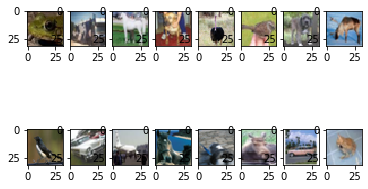

In [43]:
### YOUR CODE HERE
# a random sample would be better (each is 100% unique), however with 16/50000 it's unlikely to get a repeat
indices = np.random.randint(50000, size=(16))

for i in range(1,16,2):
    plt.subplot(2, 8, i)
    plt.imshow(x_train[indices[i-1]], interpolation='none')
    plt.subplot(2, 8, i+1)
    plt.imshow(x_train[indices[i]], interpolation='none')
    



# Prepare data

We need to normalize inputs like this: $$x_{norm} = \frac{x}{255} - 0.5$$

We need to convert class labels to one-hot encoded vectors. Use __tf.keras.utils.to_categorical__.

In [67]:
### YOUR CODE HERE for both test(x_test2) and training(x_train2) data
x_train2 = (x_train / 255) - 0.5
x_test2 = (x_test / 255) - 0.5


# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)
y_train2 = tf.keras.utils.to_categorical(cifar10_classes[0])
y_test2 = tf.keras.utils.to_categorical(cifar10_classes[0])

### YOUR CODE HERE (y_train2)
print(y_train2)
### YOUR CODE HERE (y_test2)
print(y_test2)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Define CNN architecture

Convolutional networks are built from several types of layers (you will be using tensorflow.keras):
- Conv2D - performs convolution:
    - **filters**: number of output channels; 
    - **kernel_size**: an integer or tuple/list of 2 integers, specifying the width and height of the 2D convolution window;
    - **padding**: padding="same" adds zero padding to the input, so that the output has the same width and height, padding='valid' performs convolution only in locations where kernel and the input fully overlap;
    - **activation**: "relu", "tanh", etc.
    - **input_shape**: shape of input.
- MaxPooling2D - performs 2D max pooling.
- Flatten - flattens the input, does not affect the batch size.
- Dense - fully-connected layer.
- Activation - applies an activation function.
- LeakyReLU - applies leaky relu activation.
- Dropout - applies dropout.

You need to define a model which takes __(None, 32, 32, 3)__ input and predicts __(None, 10)__ output with probabilities for all classes. __None__ in shapes stands for batch dimension.

Simple feed-forward networks in Keras can be defined in the following way:

```python
model = Sequential()  # start feed-forward model definition
model.add(Conv2D(..., input_shape=(32, 32, 3)))  # first layer needs to define "input_shape"

...  # here comes a bunch of convolutional, pooling and dropout layers

model.add(Dense(NUM_CLASSES), activation='softmax')  # the last layer with neuron for each class and softmax

```

Stack __4__ convolutional layers with kernel size __(3, 3)__ with growing number of filters __(16, 32, 32, 64)__, use "same" padding.

Add __2x2__ pooling layer after every 2 convolutional layers (conv-conv-pool scheme).

Use __LeakyReLU__ activation with recommended parameter __0.1__ for all layers that need it (after convolutional and dense layers):
```python
model.add(LeakyReLU(0.1))
```

Add a dense layer with __256__ neurons and a second dense layer with __10__ neurons for classes. Remember to use __Flatten__ layer before first dense layer to reshape input volume into a flat vector!

Add __Dropout__ after every pooling layer (__0.25__) and between dense layers (__0.5__).

In [76]:
def make_model():
    """
    Define your model architecture here. 
    Returns `Sequential` model.
    """
    model = models.Sequential()

    ### START CODE HERE ###
    model.add(layers.Conv2D(16, (3,3), padding='same', input_shape=(32, 32, 3)))
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.Conv2D(32, (3,3), padding='same'))
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 3)))
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.Conv2D(64, (3,3), padding='same'))
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(256))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    
    ### END CODE HERE ###
    
    return model

In [77]:
# Show model summary
model = make_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)       

# Train model

Training of your model can take approx. 4-8 minutes per epoch.

During training you should observe the decrease in reported loss on training and validation.

If the loss on training is not decreasing with epochs you should revise your model definition and learning rate.

In [ ]:
# Initial learning rate
INIT_LR = 

# Batch size
BATCH_SIZE = 

# Epochs
EPOCHS = 

Prepare model for fitting using compile (loss, optimizer, metric (accuracy))

In [106]:
### START CODE HERE ###
    
    
    
### END CODE HERE ###

In [107]:
# scheduler of learning rate (decay with epochs)
def lr_scheduler(epoch):
        return INIT_LR * 0.9 ** epoch

In [ ]:
# callback for printing of actual learning rate used by optimizer
class LrHistory(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        tf.print(("Learning rate:",model.optimizer.lr))
   
    

Fit model using training data, batch size, epochs, callbacks. Here you would need to use callbacks parameter 
to display the changing learning rate using the functions lr_scheduler and LrHistory. The following page will help you how to use [callbacks](https://www.tensorflow.org/guide/keras/custom_callback) (see custom callbacks).

In [111]:
# fit model
### START CODE HERE ###




# Evaluate model

In [112]:
# make test predictions

### START CODE HERE ###



## confusion matrix and accuracy

- display a 10 x 10 confusion matrix and the test accuracy. 

You may use `__sklearn.metrics__' library for confusion matrix and the accuracy score

In [114]:
### START CODE HERE ###



## Inspect Predictions 
- Display 2 rows of 8 images each randomly from the test set.
- On top or bottom of each of those images show the following
 - prediction label 
 - score (probability)
 - actual label

In [115]:
### START CODE HERE ###



# Report

Report your results for the following in this notebook

- Write observations about the confusion matrix, for example how well did each category do, or were some categories
easier of difficult to classify, etc.
- Change architecture of your network and report its effect on accuracy.
- Report the effect of changing hyper parameters like learning rate, batch size, number of epochs etc.

Have fun!